In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Figure 4.1
#the data comes from tables such as from the following:
#https://wcc.sc.egov.usda.gov/reportGenerator/view/customWaterYearGroupByMonthReport/monthly/start_of_period/820:UT:SNTL%7Cid=%22%22%7Cname/POR_BEGIN,POR_END/PREC::value?fitToScreen=false
#read the csv to pandas
snow = pd.read_csv("../data/snotel_wtr_yr_2019.csv", names = ['Year','TGL','BLP','BLT','FRM','PAR','PAY','TIM'])
#convert to cm
snow = snow.apply(lambda x: x*2.54 if x.name in ['TGL','BLP','BLT','FRM','PAR','PAY','TIM'] else x)
snow

,Year,TGL,BLP,BLT,FRM,PAR,PAY,TIM
0,1981,88.900,100.838,67.818,86.614,70.612,45.212,85.598
1,1982,206.248,183.388,146.304,177.800,104.648,73.914,131.318
2,1983,140.208,212.344,145.034,165.354,104.648,74.930,124.968
3,1984,157.480,257.048,141.478,166.624,110.236,69.342,104.140
4,1985,112.776,143.256,102.616,118.872,89.154,58.674,111.760
5,1986,175.260,235.712,161.544,171.958,98.044,71.374,138.684
6,1987,74.676,119.634,87.122,74.930,59.436,44.704,63.246
7,1988,90.170,103.886,74.930,81.280,56.388,45.974,53.340
8,1989,126.746,131.826,100.076,119.126,78.740,42.672,70.612
9,1990,88.646,106.172,84.328,88.392,61.722,42.672,91.694


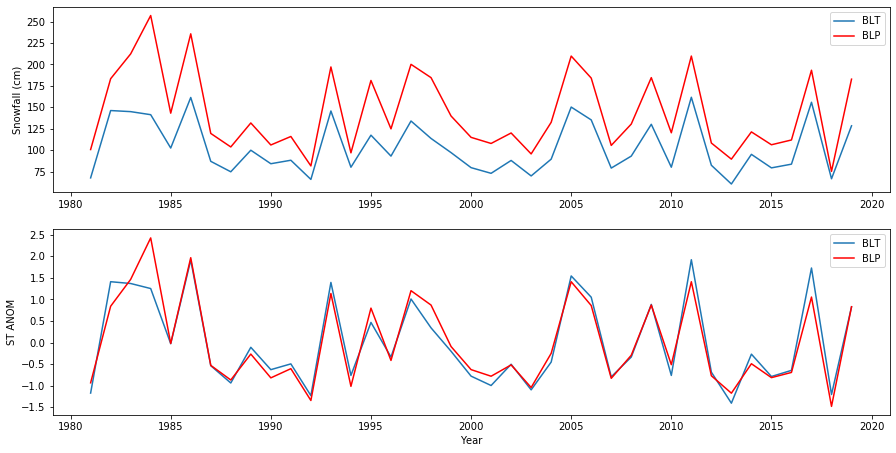

In [3]:

#plot totals
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,7.5))
ax1.plot(snow['Year'],snow['BLT'],label='BLT')
ax1.plot(snow['Year'],snow['BLP'],color='red',label='BLP')
ax1.set_ylabel('Snowfall (cm)')
ax1.legend()

#match notes - set BLT and BLP to x and y
x = snow['BLT']
y = snow['BLP']

#get means
xm = np.mean(x)
ym = np.mean(y)

#get st devs
xs = np.std(x)
ys = np.std(y)

#get anomalies
xprime = x - xm
yprime = y - ym

#standardize anomalies
xstar = xprime/xs
ystar = yprime/ys

#plot anomalies
ax2.plot(snow['Year'],xstar,label='BLT')
ax2.plot(snow['Year'],ystar,label='BLP',color='red')
ax2.legend()
ax2.set_ylabel('ST ANOM')
ax2.set_xlabel('Year')

plt.show()

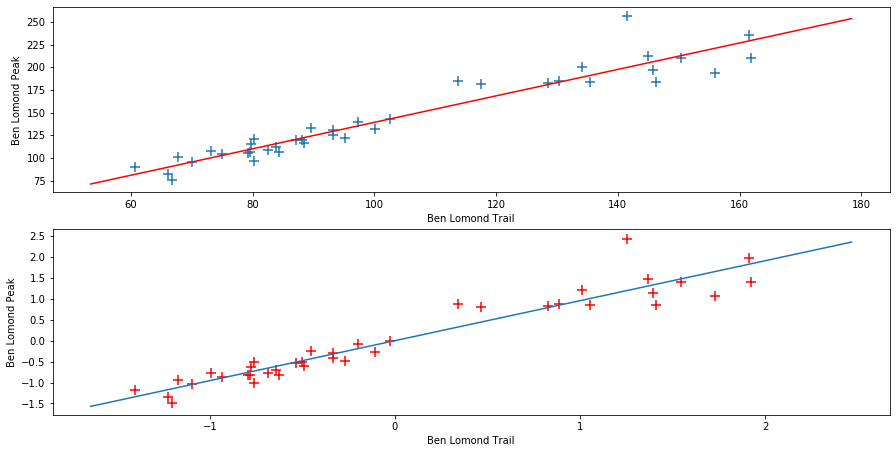

In [4]:
#Brute force regression
covar_1 = 0
varx_1 = 0
vary_1 = 0
n = len(snow)
for i in range(0,n):
    covar_1 = covar_1 + xprime[i]*yprime[i]
    varx_1 = varx_1 + xprime[i]*xprime[i]
    vary_1 = vary_1 + yprime[i]*yprime[i]

covar_1 = covar_1/n
varx_1 = varx_1/n
vary_1 = vary_1/n

b_1 = covar_1/varx_1
r_1 = covar_1/np.sqrt(varx_1*vary_1)
sdx_1 = np.sqrt(varx_1)
sdy_1 = np.sqrt(vary_1)

#using linear algebra
covar_2 = np.dot(xprime,yprime)
varx_2 = np.dot(xprime,xprime)
vary_2 = np.dot(yprime,yprime)
covar_2 = covar_2/n
varx_2 = varx_2/n
vary_2 = vary_2/n

b_2 = covar_2/varx_2
r_2 = covar_2/np.sqrt(varx_2*vary_2)
sdx_2 = np.sqrt(varx_2)
sdy_2 = np.sqrt(vary_2)

#compute estimate of y over range of x's
xhat = np.linspace(-50,75,100)
yhat = b_2*xhat

XH = xm+xhat
YH = ym+yhat

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,7.5))
ax1.scatter(x,y,marker='+',s=100)
ax1.plot(XH,YH,color='red')
ax1.set_xlabel('Ben Lomond Trail')
ax1.set_ylabel('Ben Lomond Peak')
ax2.scatter(xstar,ystar,marker='+',color='red',s=100)
ax2.plot(xhat/xs,yhat/ys)
ax2.set_xlabel('Ben Lomond Trail')
ax2.set_ylabel('Ben Lomond Peak')
plt.show()

         TGL       BLP       BLT       FRM       PAR       PAY       TIM
0  -0.935825 -0.931768 -1.169713 -1.139914 -0.606097 -0.609955 -0.190847
1   2.635055  0.842595  1.411065  1.619888  1.391043  1.453032  1.433088
2   0.625469  1.464986  1.369305  1.243202  1.391043  1.526058  1.207541
3   1.151053  2.425872  1.252377  1.281639  1.718932  1.124415  0.467749
4  -0.209282 -0.020018 -0.025484 -0.163605  0.481897  0.357641  0.738405
5   1.692095  1.967267  1.912187  1.443076  1.003538  1.270467  1.694722
6  -1.368659 -0.527759 -0.534958 -1.493537 -1.261875 -0.646468 -0.984771
7  -0.897179 -0.866253 -0.935856 -1.301351 -1.440723 -0.555186 -1.336623
8   0.215822 -0.265699 -0.109005 -0.155918 -0.129168 -0.792520 -0.723137
9  -0.943554 -0.817117 -0.626831 -1.086101 -1.127739 -0.792520  0.025678
10 -0.533908 -0.604193 -0.493198 -0.478791 -0.233497 -0.336107 -0.443459
11 -1.005388 -1.341236 -1.228177 -1.078414 -1.246971 -1.212421 -1.156186
12  0.942365  1.137412  1.394361  1.027953  1.27181

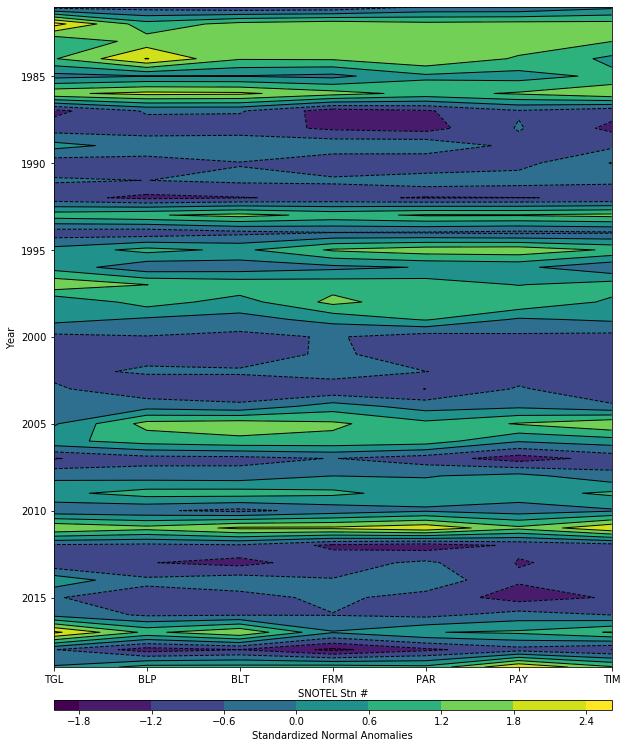

In [5]:
#Figure 6 - hovmuller diagram of standardized temporal anomalies

xt = snow.drop('Year',axis=1)
xtm = xt.mean(axis=0)
xts = np.std(xt)


no=7

#anomalies
xtp = pd.DataFrame()
for col in list(xt.columns):
    xtp[col] = xt[col].apply(lambda x : x - xtm[col])

#standardized anomalies
xstar  = pd.DataFrame()
for col in list(xtp.columns):
    xstar[col] = xtp[col].apply(lambda x : x/xts[col])
print(xstar)
fig,ax = plt.subplots(figsize=(10,15))
ax.invert_yaxis()
cf = ax.contourf(np.arange(1,no+1,1),snow['Year'],xstar,extend='both')
cs = ax.contour(np.arange(1,no+1,1),snow['Year'],xstar,colors='k', linewidths=1)
ax.set_xticklabels(xstar.columns.values)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.04, aspect=50, extendrect=True)
ax.set_xlabel('SNOTEL Stn #')
ax.set_ylabel('Year')

cbar.set_label('Standardized Normal Anomalies')
plt.show()

          TGL       BLP       BLT       FRM       PAR       PAY       TIM
TGL  1.000000  0.784331  0.857720  0.736397  0.790968  0.692687  0.768722
BLP  0.784331  1.000000  0.954246  0.907275  0.897440  0.859764  0.876823
BLT  0.857720  0.954246  1.000000  0.880532  0.876446  0.841005  0.919595
FRM  0.736397  0.907275  0.880532  1.000000  0.937884  0.846899  0.862316
PAR  0.790968  0.897440  0.876446  0.937884  1.000000  0.859072  0.889132
PAY  0.692687  0.859764  0.841005  0.846899  0.859072  1.000000  0.894366
TIM  0.768722  0.876823  0.919595  0.862316  0.889132  0.894366  1.000000


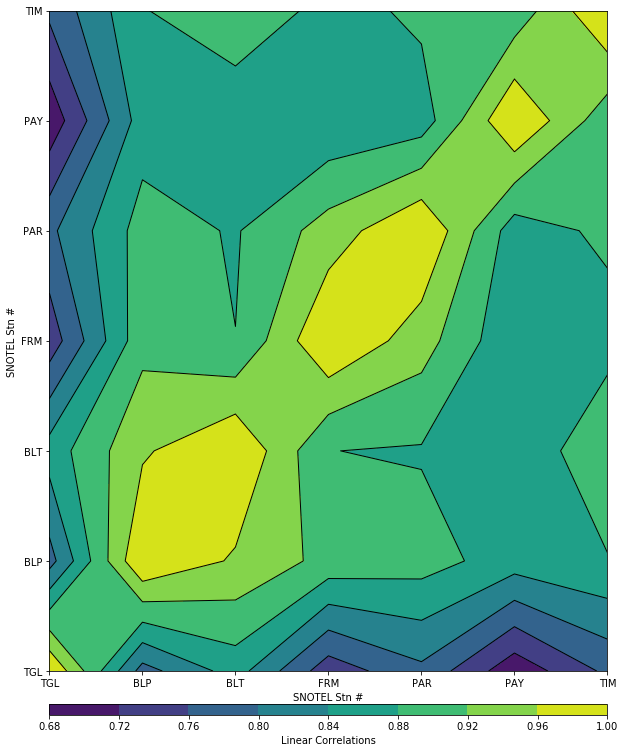

In [6]:
#compute correlation between each time series
cors=xstar.corr()
print(cors)

fig,ax = plt.subplots(figsize=(10,15))
cf = ax.contourf(cors)
cs = ax.contour(cors,colors='k', linewidths=1)
ax.set_xticklabels(xstar.columns.values)
ax.set_yticklabels(xstar.columns.values)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.04, aspect=50, extendrect=True)

ax.set_xlabel('SNOTEL Stn #')
ax.set_ylabel('SNOTEL Stn #')

cbar.set_label('Linear Correlations')
plt.show()